# `redwine_quality.ipynb`

# Red Wine Quality

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./winequality-red.csv')

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
                           mean        std      min        max
fixed acidity          8.319637   1.741096  4.60000   15.90000
volatile acidity       0.527821   0.179060  0.12000    1.58000
citric acid            0.270976   0.194801  0.00000    1.00000
residual sugar         2.538806   1.409928  0.90000   15.50000
chlorides              0.087467   0.047065  0.01200    0.61100
free sulfur dioxide   15.874922  10.460157  1.00000   72.00000
total sulfur dioxide  46.467792  32.895324  6.00000  289.00000
density                0.996747   0.001887  0.99007    1.00369
pH                     3.311113   0.154386  2.74000    4.01000
sulphates              0.658149   0.169507  0.33000    2.00000
alcohol               10.422983   1.065668  8.40000   14.90000
quality                5.636023   0.807569  3.00000 

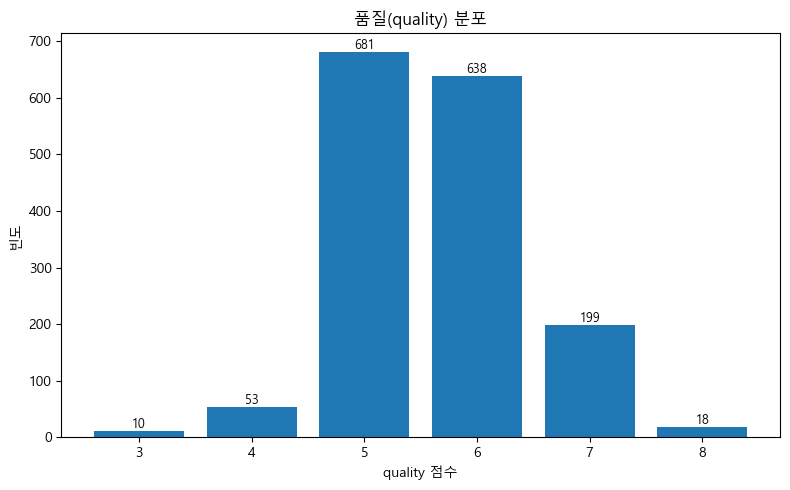

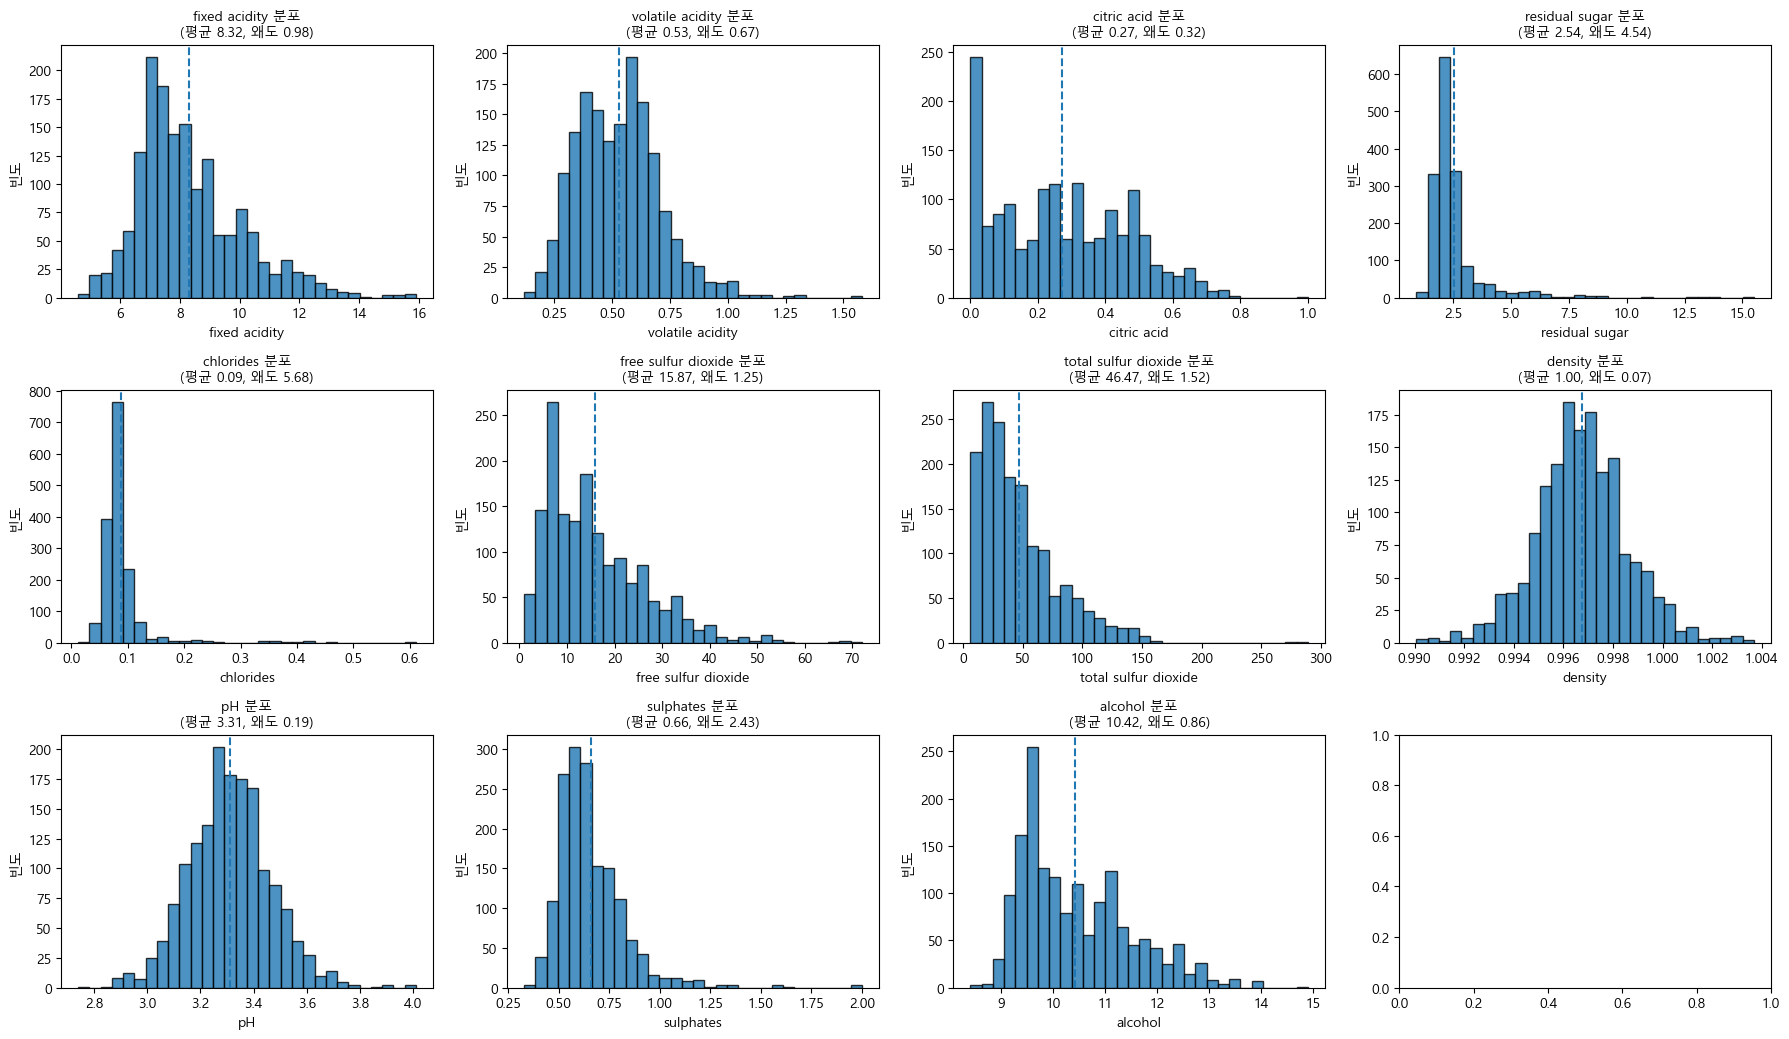

In [2]:
# 특성 살펴보기 (품질 분포, 히스토그램)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1) 데이터 로드 =====
# , 또는 ; 모두 자동 판별
csv_path = "winequality-red.csv"
df = pd.read_csv(csv_path, sep=None, engine="python")

# 컬럼 확인 (참고용)
print("Columns:", list(df.columns))
print(df.describe().T[['mean','std','min','max']])

# ===== 2) 품질(quality) 분포 =====
quality_counts = df['quality'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(quality_counts.index.astype(str), quality_counts.values)
plt.title("품질(quality) 분포")
plt.xlabel("quality 점수")
plt.ylabel("빈도")
# 막대 위에 값 표시
for x, y in zip(quality_counts.index.astype(str), quality_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# ===== 3) 각 특성 히스토그램 =====
# 'quality'를 제외한 수치형 특성들 자동 선택
feature_cols = [c for c in df.columns if c != 'quality']

n = len(feature_cols)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols + 2, 3.5*rows))
axes = np.array(axes).reshape(rows, cols)  # 2D 보장

for i, col in enumerate(feature_cols):
    r, c = divmod(i, cols)
    ax = axes[r, c]
    series = df[col].dropna()
    ax.hist(series, bins=30, edgecolor='black', alpha=0.8)
    ax.set_title(f"{col} 분포\n(평균 {series.mean():.2f}, 왜도 {series.skew():.2f})", fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel("빈도")
    # 평균선
    ax.axvline(series.mean(), linestyle="--")
    
# 남는 빈 축 숨기기
for j in range(n, rows*cols):
    r,

plt.tight_layout()
plt.show()

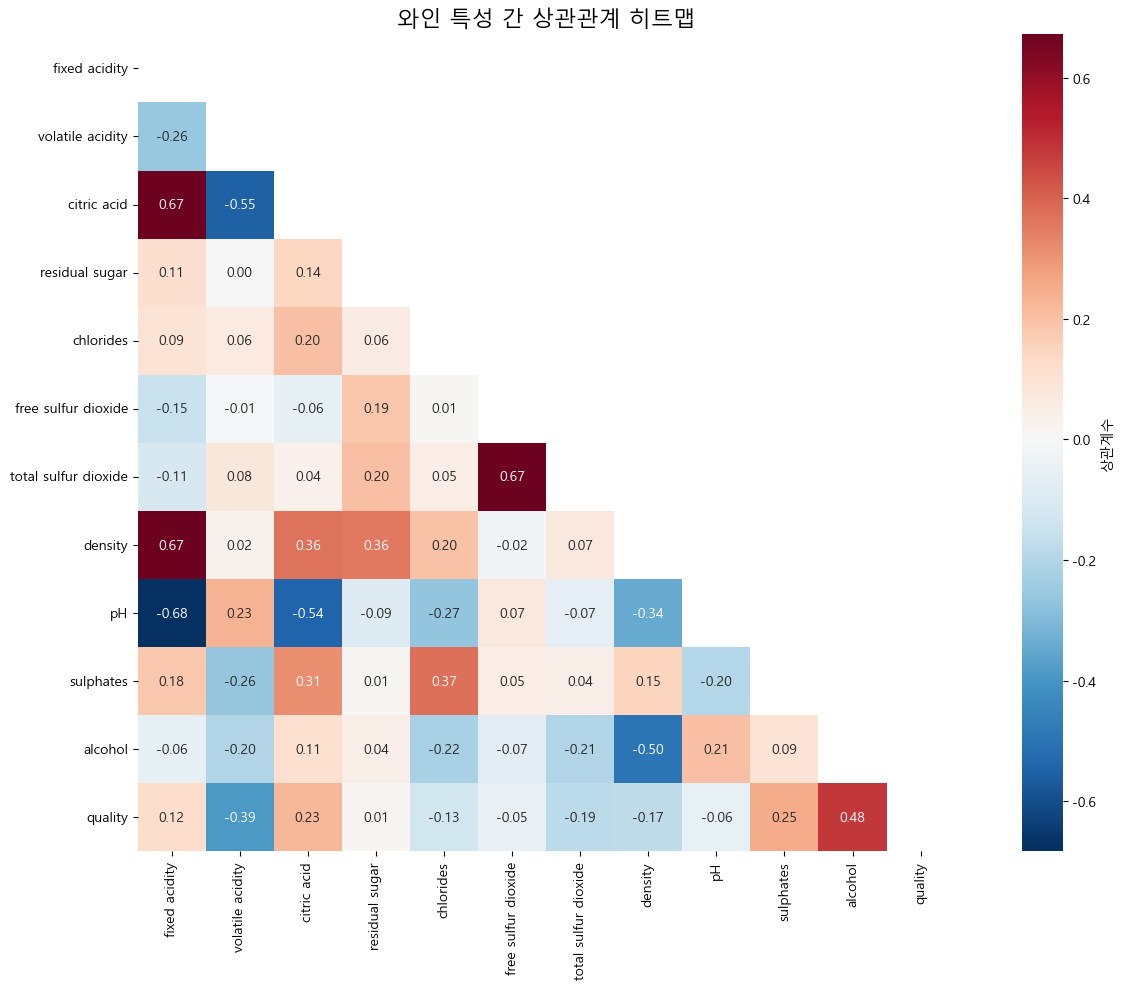

=== 품질(quality)과의 상관관계 ===
alcohol: 0.476 (양의 상관관계)
volatile acidity: -0.391 (음의 상관관계)
sulphates: 0.251 (양의 상관관계)
citric acid: 0.226 (양의 상관관계)
total sulfur dioxide: -0.185 (음의 상관관계)
density: -0.175 (음의 상관관계)
chlorides: -0.129 (음의 상관관계)
fixed acidity: 0.124 (양의 상관관계)
pH: -0.058 (음의 상관관계)
free sulfur dioxide: -0.051 (음의 상관관계)
residual sugar: 0.014 (양의 상관관계)


C:\Users\amy\AppData\Local\Temp\ipykernel_13564\371200268.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, ax=ax, palette='Set2')
C:\Users\amy\AppData\Local\Temp\ipykernel_13564\371200268.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, ax=ax, palette='Set2')
C:\Users\amy\AppData\Local\Temp\ipykernel_13564\371200268.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, ax=ax, palette='Set2')


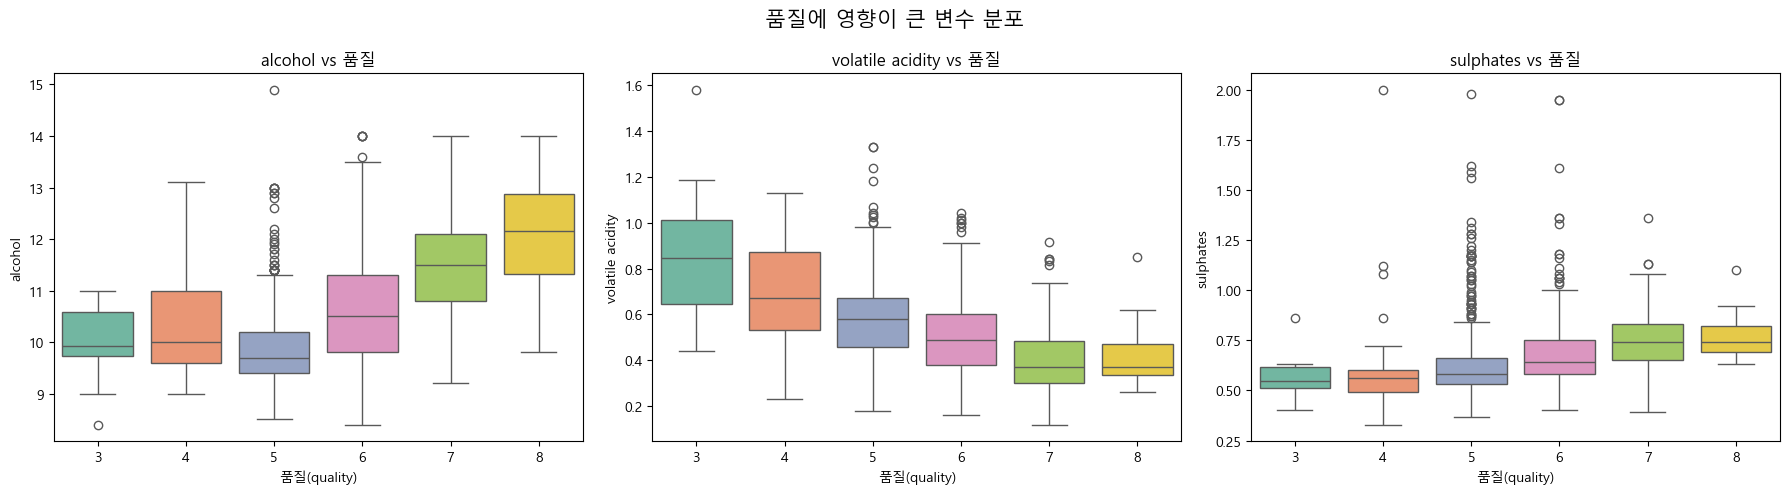

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1) 데이터 로드 =====
csv_path = "winequality-red.csv"
df = pd.read_csv(csv_path, sep=None, engine="python")

# ===== 2) 상관관계 히트맵 =====
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)

# 상삼각 마스크
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            center=0, cmap='RdBu_r', square=True,
            cbar_kws={'label': '상관계수'})
plt.title('와인 특성 간 상관관계 히트맵', fontsize=16)
plt.tight_layout()
plt.show()

# ===== 3) 품질과의 상관관계 분석 =====
print("=== 품질(quality)과의 상관관계 ===")
quality_corr = correlation_matrix['quality'].sort_values(key=abs, ascending=False)
for var, corr in quality_corr.items():
    if var != 'quality':
        direction = "양의 상관관계" if corr > 0 else "음의 상관관계"
        print(f"{var}: {corr:.3f} ({direction})")

# ===== 4) 품질에 가장 영향 큰 상위 변수들 시각화 =====
# 상관관계 절댓값 기준 상위 3개 변수 선택
top_features = quality_corr.abs().drop('quality').head(3).index.tolist()

fig, axes = plt.subplots(1, len(top_features), figsize=(6*len(top_features), 5))

for i, col in enumerate(top_features):
    ax = axes[i]
    # boxplot: 품질 그룹별 변수 분포
    sns.boxplot(x='quality', y=col, data=df, ax=ax, palette='Set2')
    ax.set_title(f"{col} vs 품질", fontsize=12)
    ax.set_xlabel("품질(quality)")
    ax.set_ylabel(col)

plt.suptitle("품질에 영향이 큰 변수 분포", fontsize=15)
plt.tight_layout()
plt.show()


In [15]:
# 훈련 테스트 셋 나누기

from sklearn.model_selection import train_test_split

y = df['quality']
X = df.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'훈련 데이터: {len(X_train)}')
print(f'테스트 데이터: {len(X_test)}')


훈련 데이터: 1199
테스트 데이터: 400


In [ ]:
# KNN 회귀로 와인 품질 예측 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

k_scores = []

for k in range(1, 21):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train_scaled, y_train)
    knr_train_score = knr.score(X_train_scaled, y_train)
    knr_test_score = knr.score(X_test_scaled, y_test)
    k_scores.append((k, knr_test_score, knr_train_score))
    
max_k, max_test_score, max_train_score = max(k_scores, key=lambda x: x[1])
print(f'최고점수 k: {max_k}, 점수: {max_test_score:.3f}')

b_knr = KNeighborsRegressor(n_neighbors=max_k)  # 나중에 쓰기

최고점수 k: 14, 점수: 0.350


In [25]:
# 선형회귀로 와인 품질 예측 (훈련셋/테스트셋의 점수를 높여보자)

from sklearn.linear_model import LinearRegression

lr_basic = LinearRegression()
lr_basic.fit(X_train, y_train)

lr_basic_score = lr_basic.score(X_test, y_test)

print(f'기본 LR Score(R^2): {lr_basic_score:.4f} (Train: {lr_basic.score(X_train, y_train)})')

# 예측 실제 값 계산(시각화)
lr_basic_pred = lr_basic.predict(X_test)

기본 LR Score(R^2): 0.3723 (Train: 0.354852874520566)


In [26]:
from sklearn.preprocessing import PolynomialFeatures
# 다항 회귀 (스케일링 필요)
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

poly_results = []
for degree in [2, 3, 4]:
    print(f'\n{degree}차수 다항식 특성 실험')
    # 다항식 특성 생성
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    print(f'원래 특성 수: {X_train_scaled.shape[1]}')
    print(f'다항식 특성 수: {X_train_poly.shape[1]}')

    # 모델 훈련
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)

    # 성능 평가
    poly_score = lr_poly.score(X_test_poly, y_test)
    poly_results.append((degree, poly_score))
    print(f'다항식 차수별 점수: {degree} -> {poly_score:.4f}')

    # Overfitting 체크를 위한 성능 확인
    train_score = lr_poly.score(X_train_poly, y_train)
    print(f'훈련 -> {train_score:.4f}')
    print(f'과적합정도 -> {train_score - poly_score:.4f}')


best_degree, best_score = max(poly_results, key=lambda x: x[1])
print(best_degree, best_score)

# 시각화를 위해 다시 훈련
poly_best = PolynomialFeatures(degree=best_degree)
X_train_poly_best = poly_best.fit_transform(X_train_scaled)
X_test_poly_best = poly_best.transform(X_test_scaled)

lr_poly_best = LinearRegression()
lr_poly_best.fit(X_train_poly_best, y_train)
lr_poly_best_score = lr_poly_best.score(X_test_poly_best, y_test)
lr_poly_best_pred = lr_poly_best.predict(X_test_poly_best)


2차수 다항식 특성 실험
원래 특성 수: 11
다항식 특성 수: 77
다항식 차수별 점수: 2 -> 0.3745
훈련 -> 0.4389
과적합정도 -> 0.0644

3차수 다항식 특성 실험
원래 특성 수: 11
다항식 특성 수: 363
다항식 차수별 점수: 3 -> -0.3482
훈련 -> 0.6528
과적합정도 -> 1.0010

4차수 다항식 특성 실험
원래 특성 수: 11
다항식 특성 수: 1364
다항식 차수별 점수: 4 -> -3185.0570
훈련 -> 1.0000
과적합정도 -> 3186.0570
2 0.37445416528963726


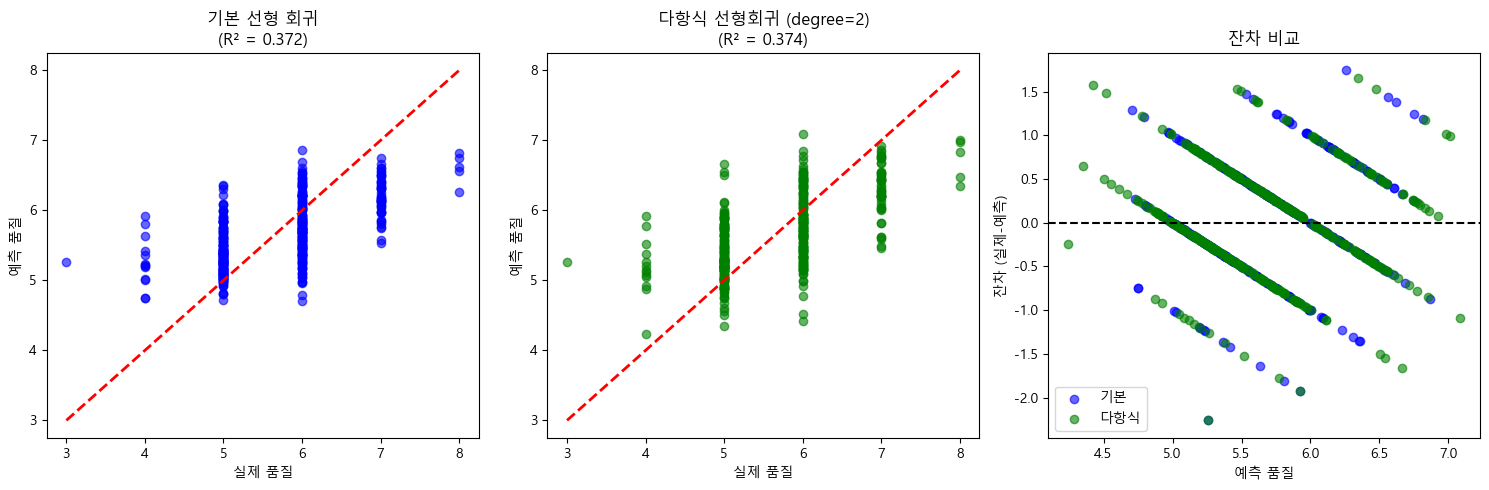

성능 향상: 0.0022 (0.6%)


In [27]:
# Ridge, Lasso 로 규제해가며 예측 

# 예측 vs 실제값 비교
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_basic_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 품질')
plt.ylabel('예측 품질')
plt.title(f'기본 선형 회귀\n(R² = {lr_basic_score:.3f})')

plt.subplot(1, 3, 2)
plt.scatter(y_test, lr_poly_best_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 품질')
plt.ylabel('예측 품질')
plt.title(f'다항식 선형회귀 (degree={best_degree})\n(R² = {lr_poly_best_score:.3f})')

plt.subplot(1, 3, 3)
# 잔차 비교
residuals_basic = y_test - lr_basic_pred
residuals_poly = y_test - lr_poly_best_pred

plt.scatter(lr_basic_pred, residuals_basic, alpha=0.6, color='blue', label='기본')
plt.scatter(lr_poly_best_pred, residuals_poly, alpha=0.6, color='green', label='다항식')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('예측 품질')
plt.ylabel('잔차 (실제-예측)')
plt.title('잔차 비교')
plt.legend()

plt.tight_layout()
plt.show()

improvement = lr_poly_best_score - lr_basic_score
print(f"성능 향상: {improvement:.4f} ({improvement/lr_basic_score*100:.1f}%)")


In [28]:
from sklearn.linear_model import Ridge, Lasso

# 다항식 특성에 대해 Ridge/Lasso 적용 (앞서 만든 최적 degree 사용)
print(f"다항식 특성 (degree={best_degree}) 데이터 사용:")
print(f"특성 수: {X_train_poly_best.shape[1]}개")

# Ridge 회귀 (다항식 특성에 대해)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_scores_poly = []
ridge_train_scores = []

print("\nRidge 회귀 (다항식 특성):")
for alpha in alphas:
    ridge_poly = Ridge(alpha=alpha)
    ridge_poly.fit(X_train_poly_best, y_train)
    
    # 테스트 성능
    ridge_score = ridge_poly.score(X_test_poly_best, y_test)
    ridge_scores_poly.append(ridge_score)
    
    # 훈련 성능 (과적합 체크용)
    ridge_train_score = ridge_poly.score(X_train_poly_best, y_train)
    ridge_train_scores.append(ridge_train_score)
    
    print(f"  alpha={alpha:7.3f}: 테스트={ridge_score:.4f}, 훈련={ridge_train_score:.4f}, 차이={ridge_train_score-ridge_score:.4f}")

best_ridge_alpha_poly = alphas[np.argmax(ridge_scores_poly)]
best_ridge_score_poly = max(ridge_scores_poly)

# Lasso 회귀 (다항식 특성에 대해)
lasso_scores_poly = []
lasso_train_scores = []

print("\nLasso 회귀 (다항식 특성):")
for alpha in alphas:
    lasso_poly = Lasso(alpha=alpha, max_iter=2000)
    lasso_poly.fit(X_train_poly_best, y_train)
    
    # 테스트 성능
    lasso_score = lasso_poly.score(X_test_poly_best, y_test)
    lasso_scores_poly.append(lasso_score)
    
    # 훈련 성능
    lasso_train_score = lasso_poly.score(X_train_poly_best, y_train)
    lasso_train_scores.append(lasso_train_score)
    
    print(f"  alpha={alpha:7.3f}: 테스트={lasso_score:.4f}, 훈련={lasso_train_score:.4f}, 차이={lasso_train_score-lasso_score:.4f}")

best_lasso_alpha_poly = alphas[np.argmax(lasso_scores_poly)]
best_lasso_score_poly = max(lasso_scores_poly)

print(f"\n🏆 최적 성능:")
print(f"Ridge (다항식) - alpha: {best_ridge_alpha_poly}, Score: {best_ridge_score_poly:.4f}")
print(f"Lasso (다항식) - alpha: {best_lasso_alpha_poly}, Score: {best_lasso_score_poly:.4f}")


다항식 특성 (degree=2) 데이터 사용:
특성 수: 78개

Ridge 회귀 (다항식 특성):
  alpha=  0.001: 테스트=0.3745, 훈련=0.4389, 차이=0.0644
  alpha=  0.010: 테스트=0.3745, 훈련=0.4389, 차이=0.0644
  alpha=  0.100: 테스트=0.3745, 훈련=0.4389, 차이=0.0643
  alpha=  1.000: 테스트=0.3753, 훈련=0.4388, 차이=0.0635
  alpha= 10.000: 테스트=0.3799, 훈련=0.4374, 차이=0.0575
  alpha=100.000: 테스트=0.3929, 훈련=0.4258, 차이=0.0329
  alpha=1000.000: 테스트=0.3496, 훈련=0.3498, 차이=0.0002

Lasso 회귀 (다항식 특성):
  alpha=  0.001: 테스트=0.3835, 훈련=0.4362, 차이=0.0527
  alpha=  0.010: 테스트=0.3904, 훈련=0.4104, 차이=0.0200
  alpha=  0.100: 테스트=0.3090, 훈련=0.3057, 차이=-0.0033
  alpha=  1.000: 테스트=-0.0020, 훈련=0.0000, 차이=0.0020
  alpha= 10.000: 테스트=-0.0020, 훈련=0.0000, 차이=0.0020
  alpha=100.000: 테스트=-0.0020, 훈련=0.0000, 차이=0.0020
  alpha=1000.000: 테스트=-0.0020, 훈련=0.0000, 차이=0.0020

🏆 최적 성능:
Ridge (다항식) - alpha: 100.0, Score: 0.3929
Lasso (다항식) - alpha: 0.01, Score: 0.3904


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

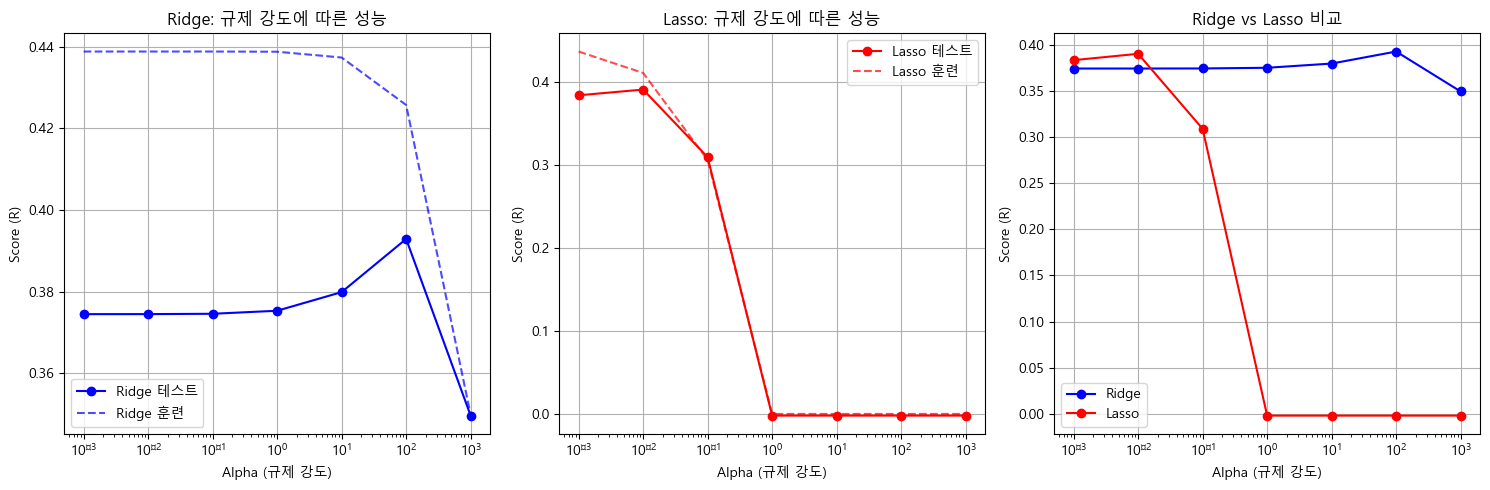

In [29]:
# Alpha 값에 따른 성능 비교 (훈련 vs 테스트)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge 테스트')
plt.plot(alphas, ridge_train_scores, 'b--', alpha=0.7, label='Ridge 훈련')
plt.xlabel('Alpha (규제 강도)')
plt.ylabel('Score (R)')
plt.title('Ridge: 규제 강도에 따른 성능')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso 테스트')
plt.plot(alphas, lasso_train_scores, 'r--', alpha=0.7, label='Lasso 훈련')
plt.xlabel('Alpha (규제 강도)')
plt.ylabel('Score (R)')
plt.title('Lasso: 규제 강도에 따른 성능')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge')
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso')
plt.xlabel('Alpha (규제 강도)')
plt.ylabel('Score (R)')
plt.title('Ridge vs Lasso 비교')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
